In [21]:
import cv2
import numpy as np
cap = cv2.VideoCapture('tracking1.avi')
while(cap.isOpened):
# Take each frame
    ret, frame = cap.read()
    if ret == False:
        break
    # Convert BGR to HSV
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    # define range of blue color in HSV
    lower_blue = np.array([110,50,50])
    upper_blue = np.array([130,255,255])
    # Threshold the HSV image to get only blue colors
    mask = cv2.inRange(hsv, lower_blue, upper_blue)
    # Bitwise-AND mask and original image
    res = cv2.bitwise_and(frame,frame, mask= mask)
    cv2.imshow('frame',frame)
    cv2.imshow('mask',mask)
    cv2.imshow('res',res)
    k = cv2.waitKey(25) & 0xFF
    if k == 27:
        break

cap.release()
cv2.destroyAllWindows()

Simple Thresholding

In [43]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [57]:
img = cv2.imread('sIMG_2180.jpg',0)
ret,thresh1 = cv2.threshold(img,168,255,cv2.THRESH_BINARY)

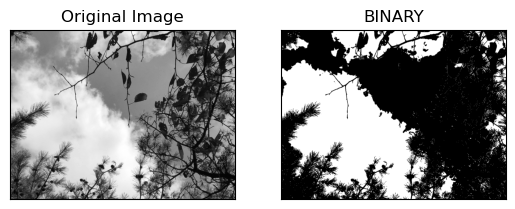

In [58]:
titles = ['Original Image','BINARY']
images = [img, thresh1]
for i in range(2):
    plt.subplot(1,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
    
plt.show()

Adaptive Thresholding


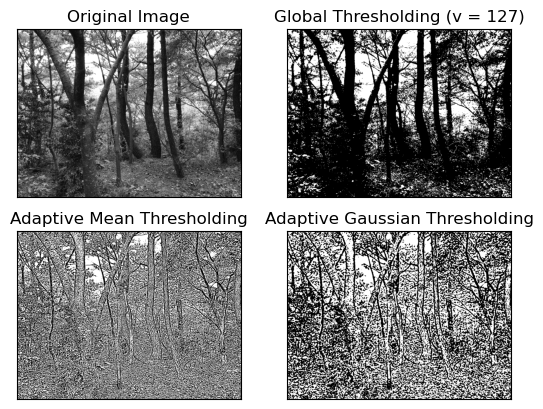

In [66]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sIMG_2177.jpg',0)
#img = cv2.medianBlur(img,5)
ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
cv2.THRESH_BINARY,11,2)
mbth3 = cv2.medianBlur(th3,5)
titles = ['Original Image', 'Global Thresholding (v = 127)',
'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th3, mbth3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()


Otsu’s Binarization

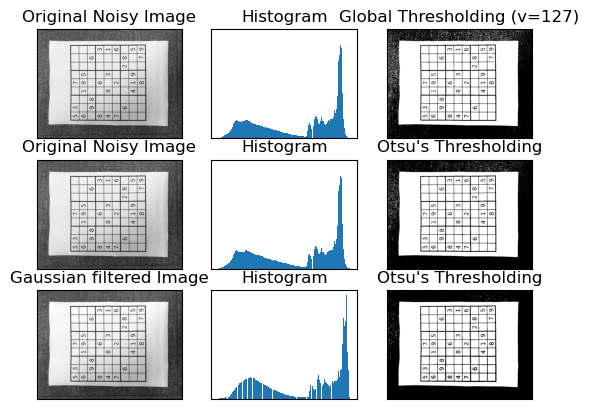

In [68]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('sIMG_2164.jpg',0)

#global thresholding
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)

#Otsu's thresholding
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#Otsu's thresholding after Gaussian filtering
blur = cv2.GaussianBlur(img,(5,5),0)
ret3,th3 = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1, img, 0, th2, blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
'Original Noisy Image','Histogram',"Otsu's Thresholding",
'Gaussian filtered Image','Histogram',"Otsu's Thresholding"]
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()


In [75]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('sIMG_2164.jpg',0)
blur = cv2.GaussianBlur(img,(5,5),0)
# find normalized_histogram, and its cumulative distribution function
hist = cv2.calcHist([blur],[0],None,[256],[0,256])
hist_norm = hist.ravel()/hist.max()
Q = hist_norm.cumsum()
bins = np.arange(256)
fn_min = np.inf
thresh = -1
for i in range(1,256):
    p1,p2 = np.hsplit(hist_norm,[i]) # probabilities
    q1,q2 = Q[i],Q[255]-Q[i] # cum sum of classes
    b1,b2 = np.hsplit(bins,[i]) # weights
    # finding means and variances
    m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
    v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2
    # calculates the minimization function
    fn = v1*q1 + v2*q2
    if fn < fn_min:
        fn_min = fn
    thresh = i

# find otsu's threshold value with OpenCV function
ret, otsu = cv2.threshold(blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print (thresh,ret)

255 146.0


C:\Users\U303-22\AppData\Local\Temp\ipykernel_14764\4028303993.py:19: RuntimeWarning: invalid value encountered in scalar divide
  m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
C:\Users\U303-22\AppData\Local\Temp\ipykernel_14764\4028303993.py:19: RuntimeWarning: divide by zero encountered in scalar divide
  m1,m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2
C:\Users\U303-22\AppData\Local\Temp\ipykernel_14764\4028303993.py:20: RuntimeWarning: invalid value encountered in multiply
  v1,v2 = np.sum(((b1-m1)**2)*p1)/q1,np.sum(((b2-m2)**2)*p2)/q2


1.4.3

In [2]:
mport cv2
import numpy as npi

In [3]:
img = cv2.imread('image.jpg')
res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC)

In [ ]:

height, width = img.shape[:2]
res = cv2.resize(img,(4*width, 2*height), interpolation = cv2.INTER_CUBIC)

In [5]:
cv2.imshow('org_img',img)
cv2.imshow('resize_img',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

KeyboardInterrupt: 

translation

In [4]:
print(img.shape)

(340, 340, 3)


In [4]:
rows,cols = img.shape[:2]
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))

rotation

In [5]:
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))

In [6]:
cv2.imshow('org_img',img)
cv2.imshow('resize_img',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

affine transformation

In [4]:
img = cv2.imread('notebook.png')
rows,cols,ch = img.shape

In [3]:
pts1 = np.float32([[244,164,],[790,190],[110,946]])
pts2 = np.float32([[100,100],[700,100],[100,900]])
M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))

NameError: name 'img' is not defined

In [10]:
cv2.imshow('org_img',img)
cv2.imshow('resize_img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

Perspective Transformation

In [3]:
import cv2
import numpy as np

img = cv2.imread('notebook.png')
rows,cols,ch = img.shape


In [4]:
pts1 = np.float32([[244,164,],[790,190],[110,946],[800,1010]])
pts2 = np.float32([[100,100],[700,100],[100,900],[700,900]])
M = cv2.getPerspectiveTransform(pts1,pts2)
dst = cv2.warpPerspective(img,M,(800,1000))

In [5]:
cv2.imshow('org_img',img)
cv2.imshow('resize_img',dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

1.4.4

### 2D Convolution ( Image Filtering )

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
img = cv2.imread('opencv.png')
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(img,-1,kernel)

In [4]:
print(kernel)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


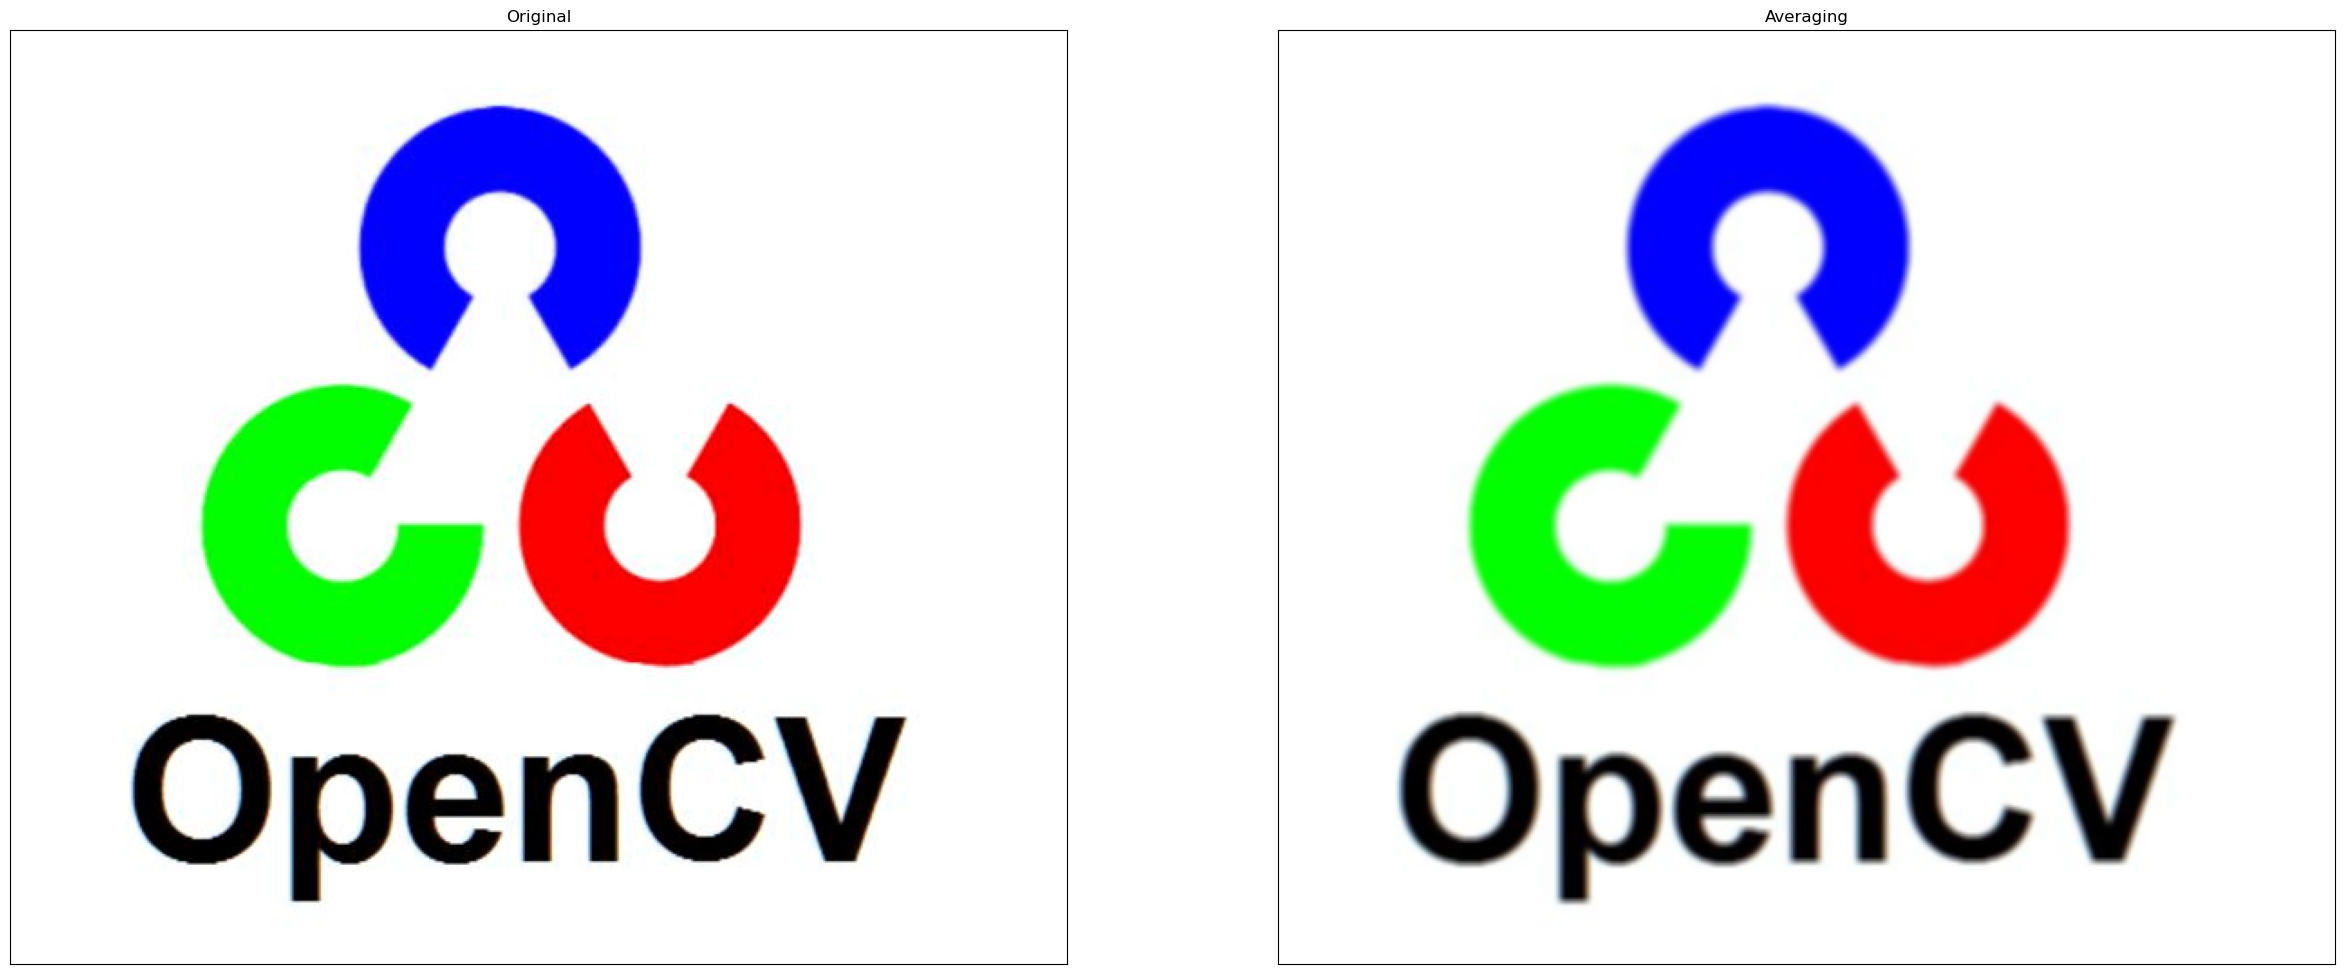

In [5]:
plt.figure(figsize=(30,20))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

In [13]:
blur = cv2.blur(img,(9,9))

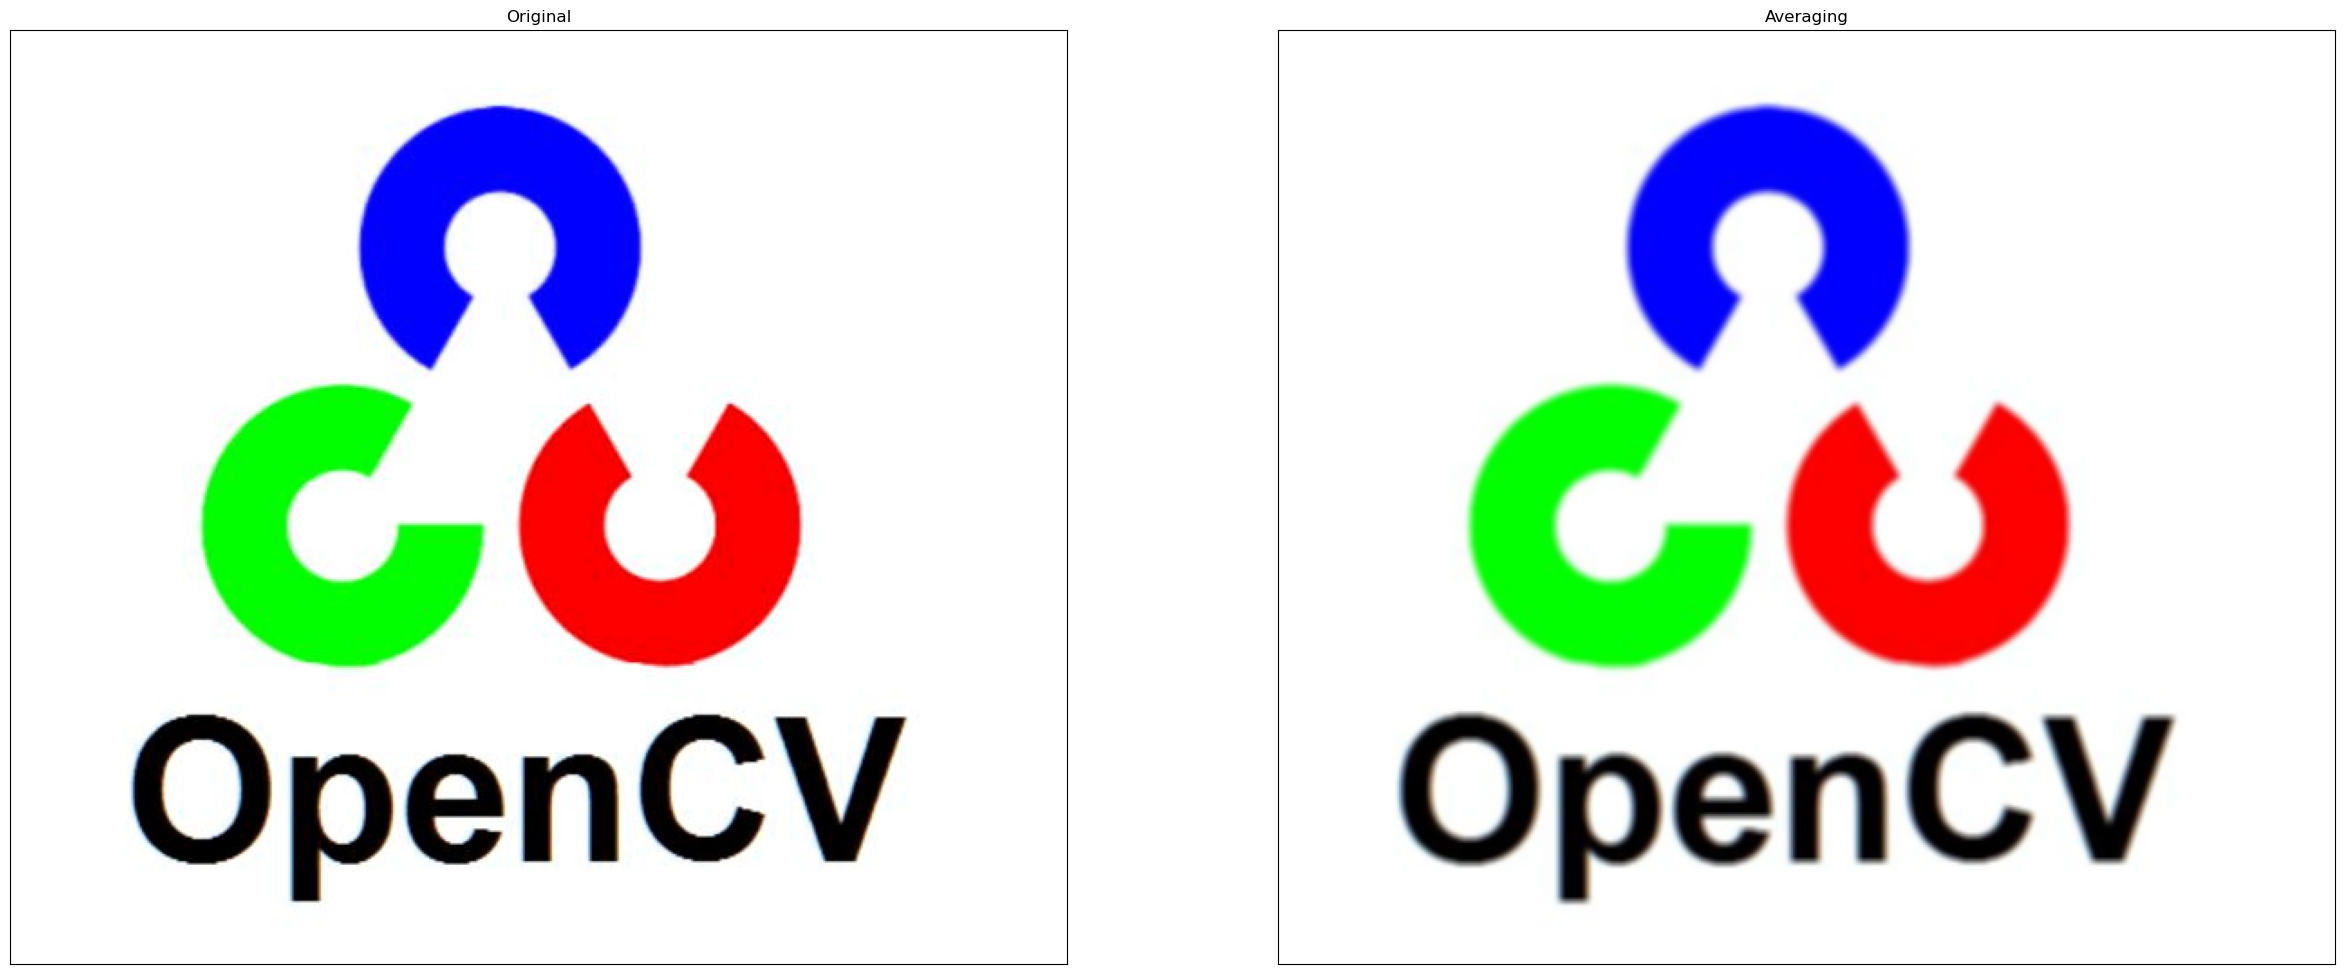

In [14]:
plt.figure(figsize=(30,20))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

In [15]:
blur = cv2.GaussianBlur(img,(5,5),0)

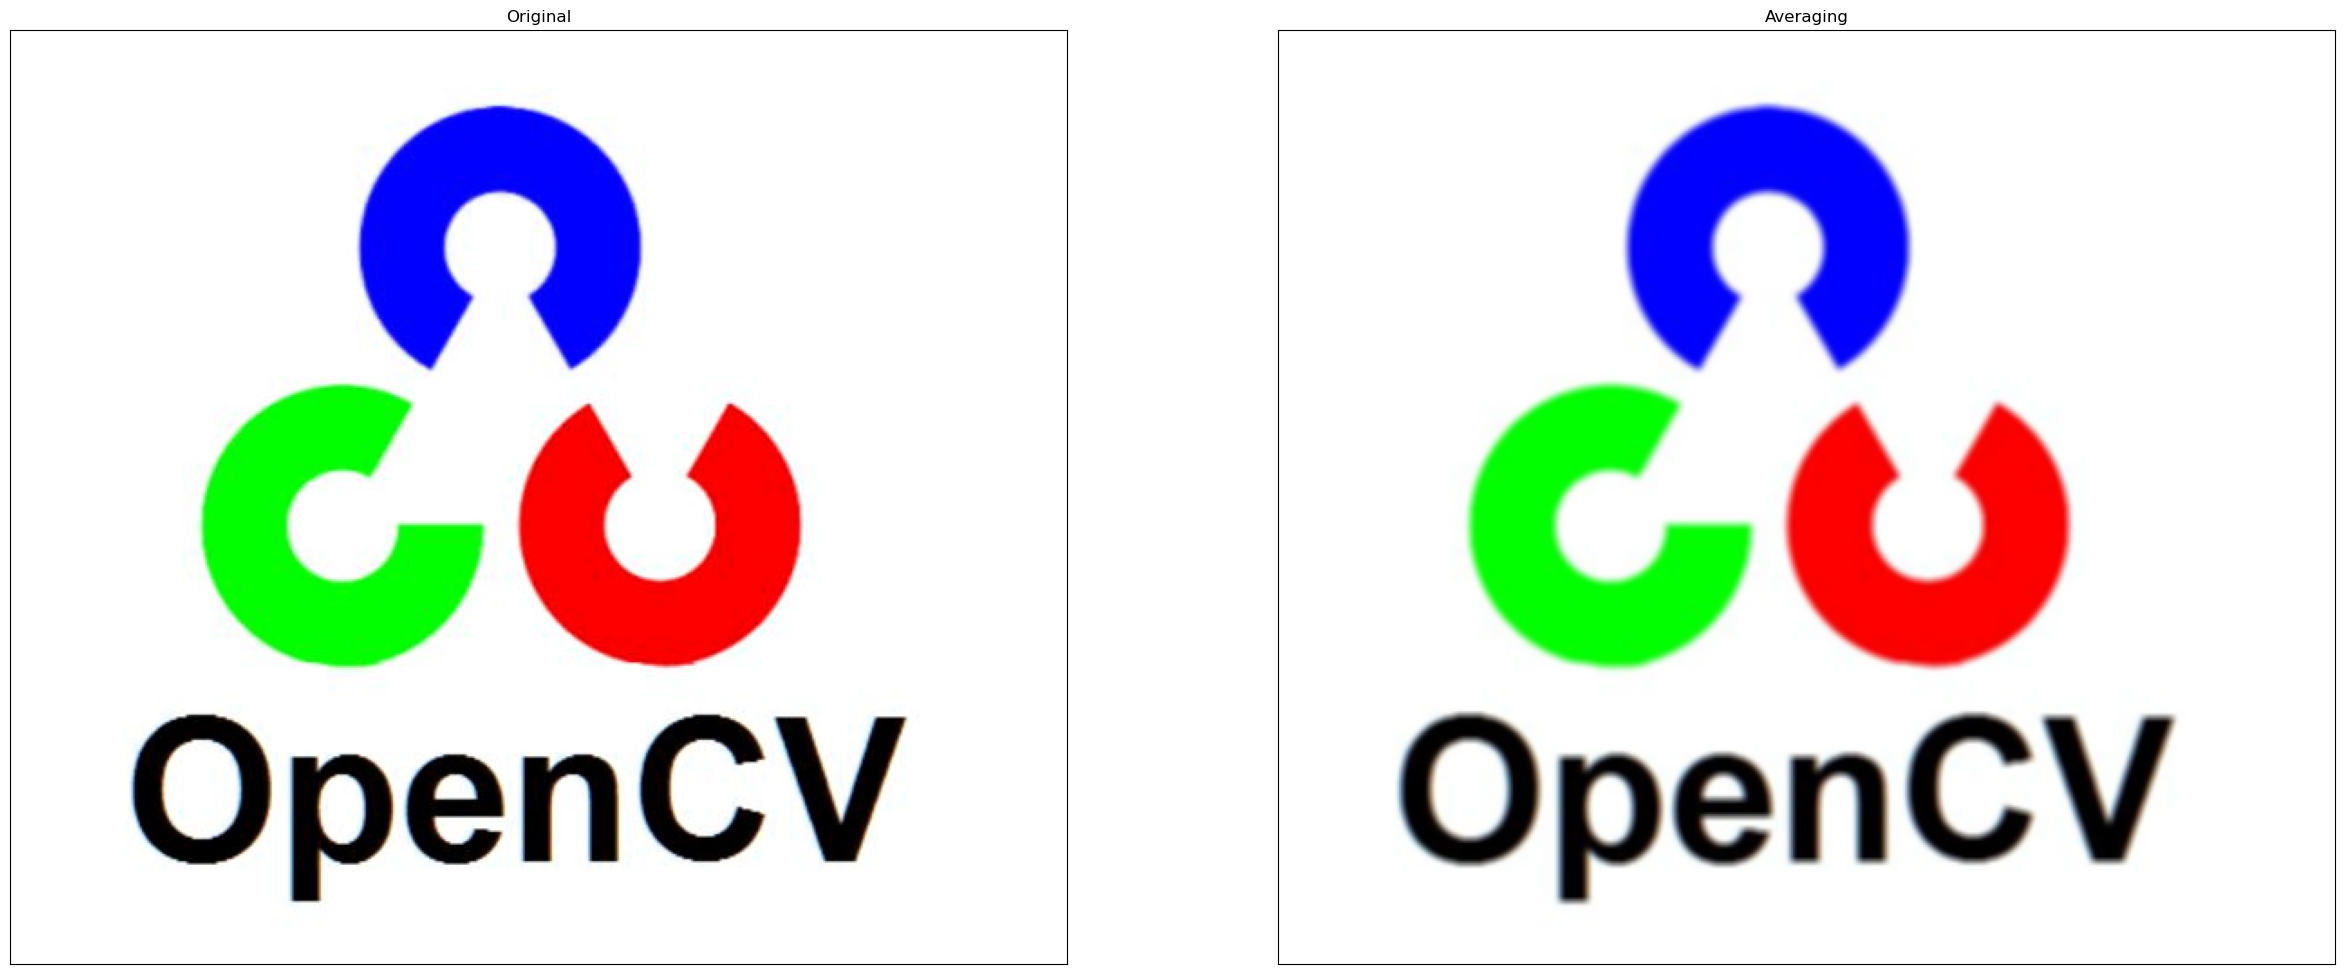

In [16]:
plt.figure(figsize=(30,20))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

noise 있는 이미지 이용.

In [20]:
median = cv2.medianBlur(img,5)

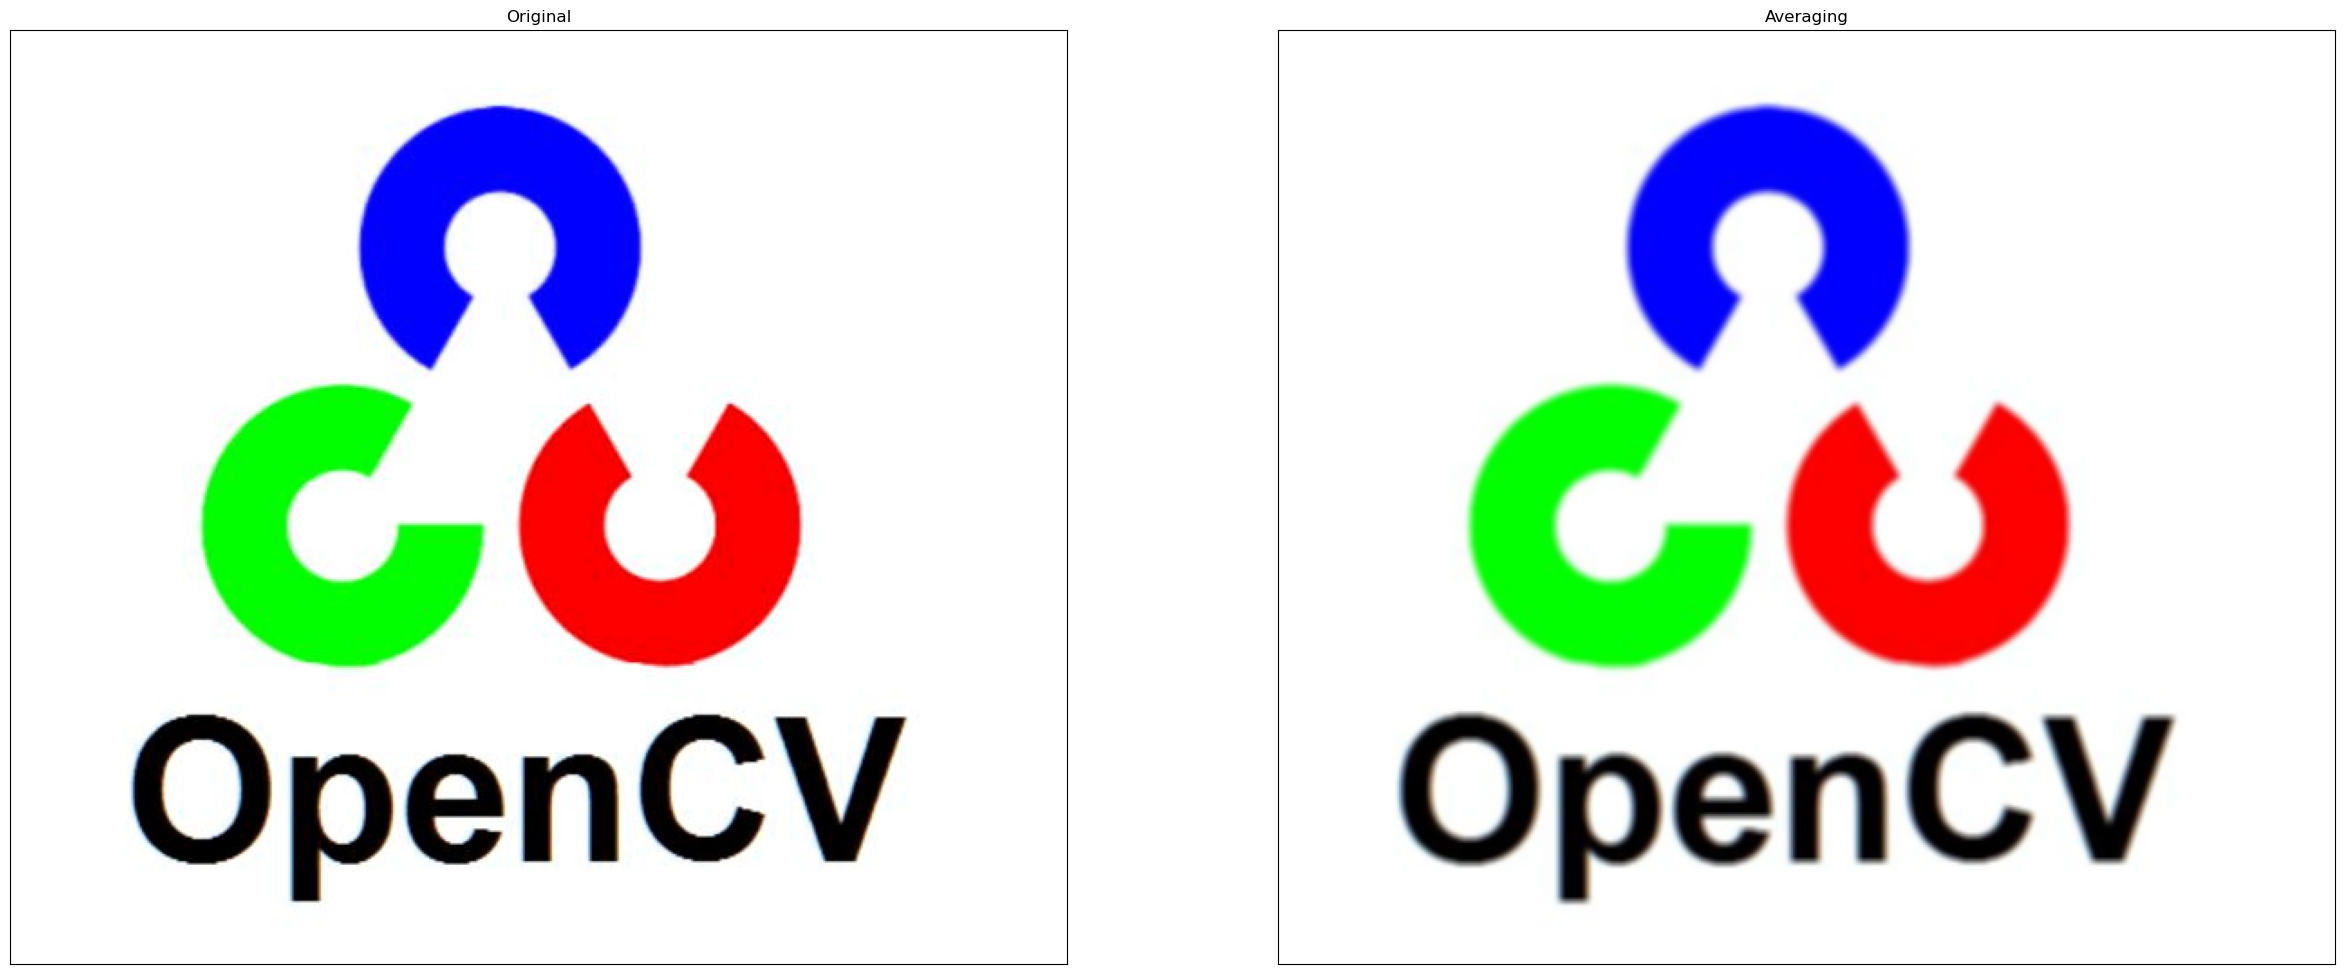

In [21]:
plt.figure(figsize=(30,20))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

In [22]:
blur = cv2.bilateralFilter(img,9,75,75)

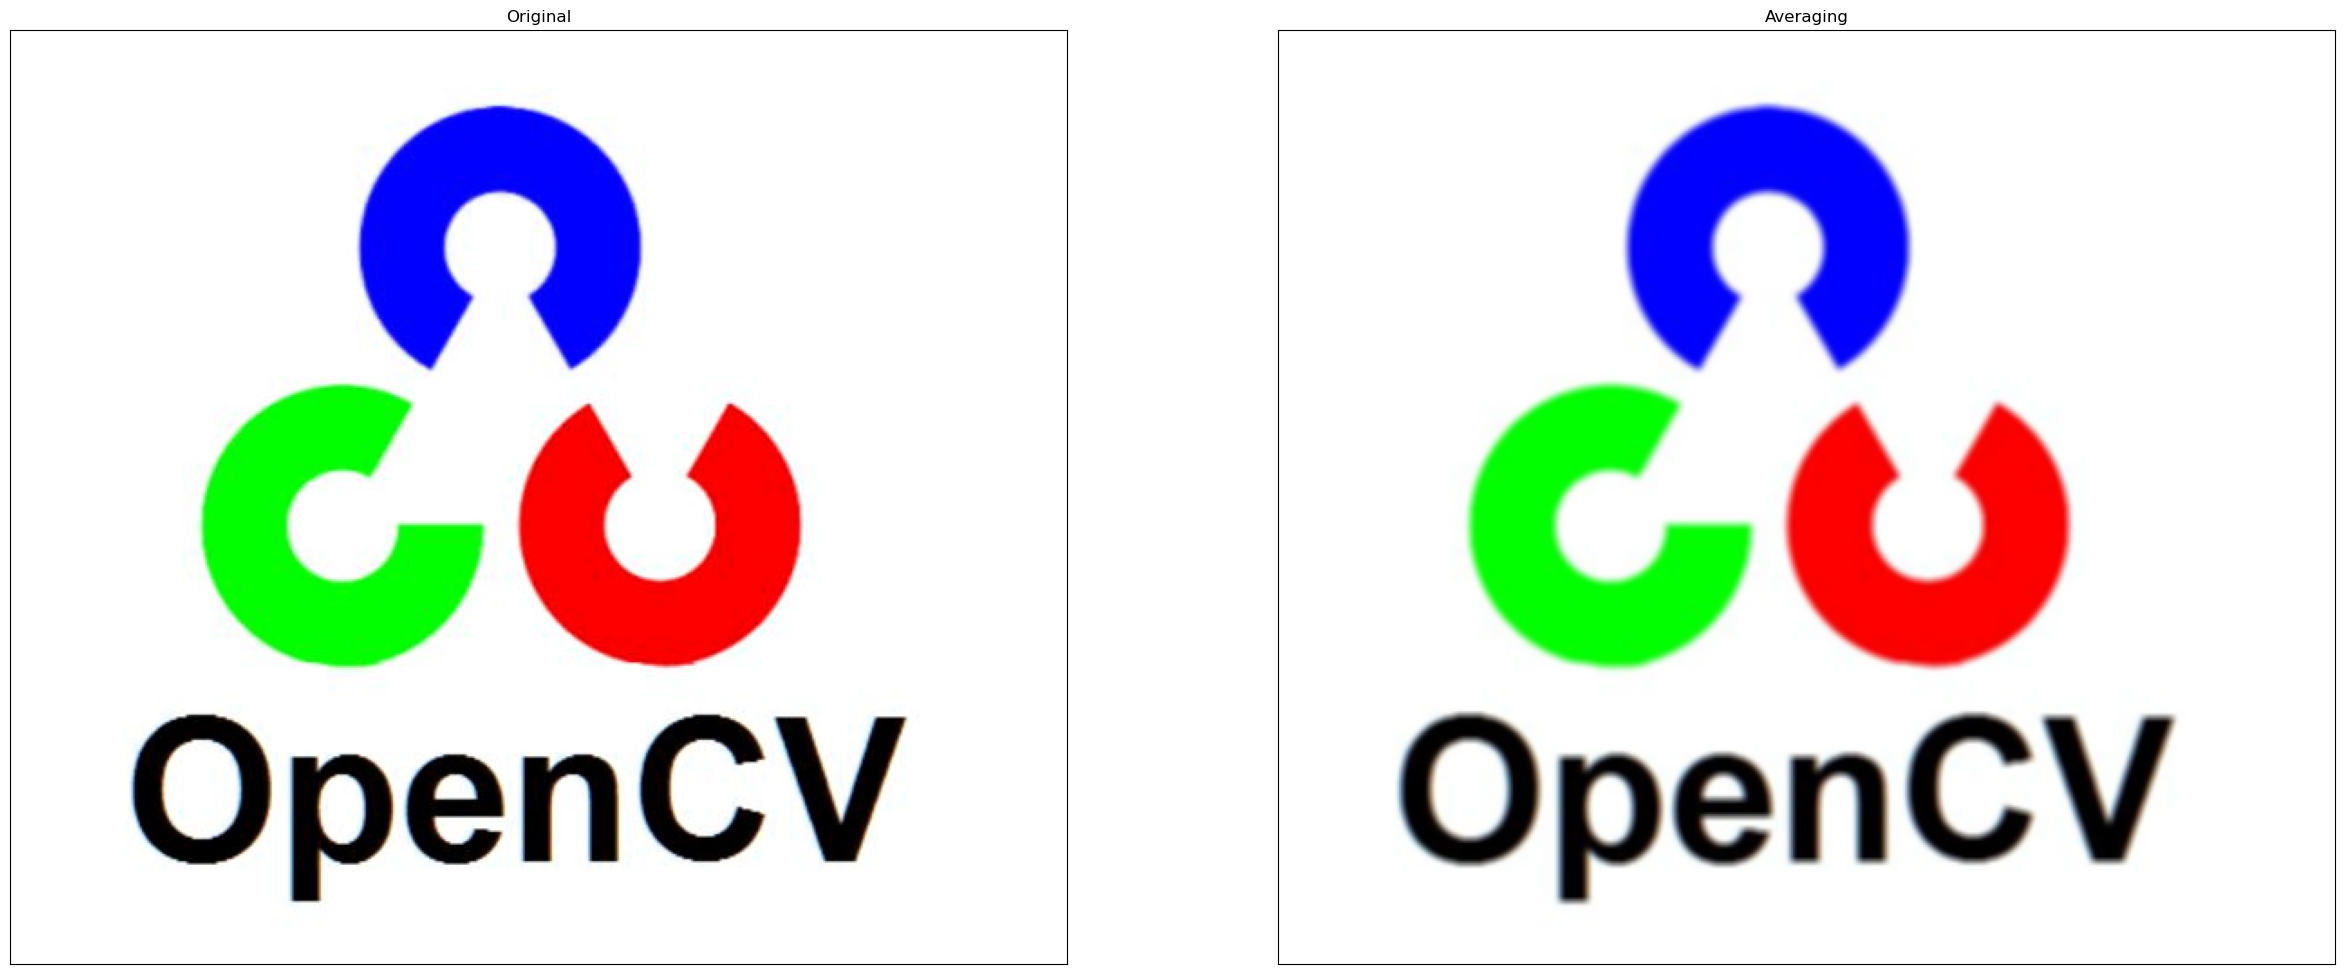

In [23]:
plt.figure(figsize=(30,20))
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

1.4.5

# Morphological Transformations


Morphological 
모양, 형태가 바뀌는 것.